# Goodreads books

1. Ar knygos vertinimas priklauso nuo puslapių skaičiaus
2. Ar vartotojai daugiausia yra parašę atsiliepimų prie geriausiai vertintų knygų
3. Ar yra ryškus laikotarpis (metai) kada buvo daugiausiai išleista knygų
4. Ar yra ryškiai lyderiaujanti leidykla, kurios knygos vertinamos geriausiai

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Duomenų tvarkymas

In [2]:
books_raw = pd.read_csv('books.csv', on_bad_lines='skip')
books_raw.head(3)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic


In [3]:
books_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [4]:
books_raw.describe(include='all')

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
count,11123.000000,11123,11123,11123.000000,11123,1.112300e+04,11123,11123.000000,1.112300e+04,11123.000000,11123,11123
unique,NaN,10348,6639,NaN,11123,NaN,27,NaN,NaN,NaN,3679,2290
top,NaN,The Iliad,Stephen King,NaN,0439785960,NaN,eng,NaN,NaN,NaN,10/1/2005,Vintage
freq,NaN,9,40,NaN,1,NaN,8908,NaN,NaN,NaN,56,318
mean,21310.856963,NaN,NaN,3.934075,NaN,9.759880e+12,NaN,336.405556,1.794285e+04,542.048099,NaN,NaN
std,13094.727252,NaN,NaN,0.350485,NaN,4.429758e+11,NaN,241.152626,1.124992e+05,2576.619589,NaN,NaN
min,1.000000,NaN,NaN,0.000000,NaN,8.987060e+09,NaN,0.000000,0.000000e+00,0.000000,NaN,NaN
25%,10277.500000,NaN,NaN,3.770000,NaN,9.780345e+12,NaN,192.000000,1.040000e+02,9.000000,NaN,NaN
50%,20287.000000,NaN,NaN,3.960000,NaN,9.780582e+12,NaN,299.000000,7.450000e+02,47.000000,NaN,NaN
75%,32104.500000,NaN,NaN,4.140000,NaN,9.780872e+12,NaN,416.000000,5.000500e+03,238.000000,NaN,NaN


In [151]:
null_reiksmes = books_raw.isna()
null_reiksmes.sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [ ]:
books_raw.drop_duplicates()
books_raw

In [7]:
books = books_raw.drop(columns=['isbn13', 'isbn', 'bookID'])
books.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


In [8]:
books = books.rename(columns={'  num_pages': 'num_pages'})

In [10]:
books['publication_date'] = pd.to_datetime(books['publication_date'], errors='coerce')
books.head(2)


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.


In [12]:
author_name = books.iloc[0, 1]
author_name.split('/')[0]

'J.K. Rowling'

In [13]:
def author_name_good(author_name):
    return author_name.split('/')[0]

In [14]:
books['authors'] = books['authors'].apply(author_name_good)
books.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.


# Duomenų analizė

# Vertinimai

In [73]:
grouped_books = books.groupby(np.ceil(books['average_rating']))['ratings_count'].apply(lambda x: sum(x))[1:]
#grouped_books = grouped_books[1:]
grouped_books

average_rating
1.0            3
2.0           10
3.0        65399
4.0     95268575
5.0    104244312
Name: ratings_count, dtype: int64

In [121]:
counts = grouped_books.array
counts[2] = np.sum(counts[0:3])
counts = counts[2:]
counts


<PandasArray>
[65412, 95268575, 104244312]
Length: 3, dtype: int64

Text(0.5, 1.0, 'Top ratings')

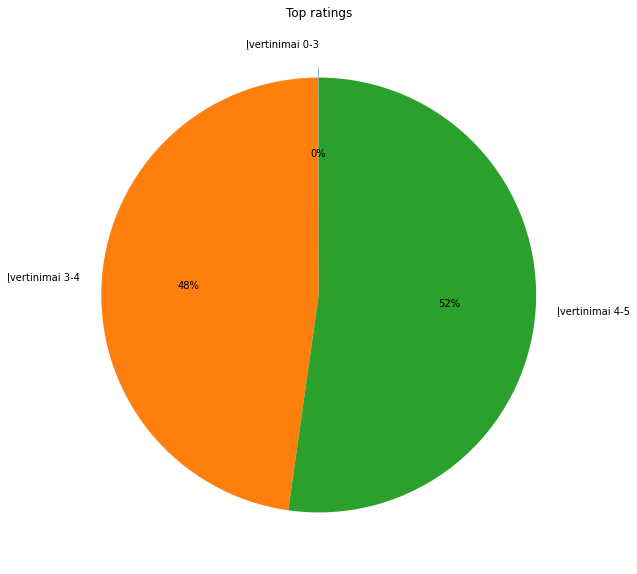

In [127]:
labels = ['Įvertinimai 0-3', 'Įvertinimai 3-4', 'Įvertinimai 4-5']
explode = (.05,0,0)

fig, ax = plt.subplots(figsize = (10,10))
ax.pie(counts, labels=labels, explode=explode, autopct='%1.f%%', startangle=90)
ax.set_title('Top ratings')


## Geriausiai įvertintos knygos

In [15]:
top_books = books[books['ratings_count'] > 1000000]
top_books = top_books.sort_values(by='average_rating', ascending=False)
top_books = top_books.head(15)

<AxesSubplot:xlabel='average_rating', ylabel='title'>

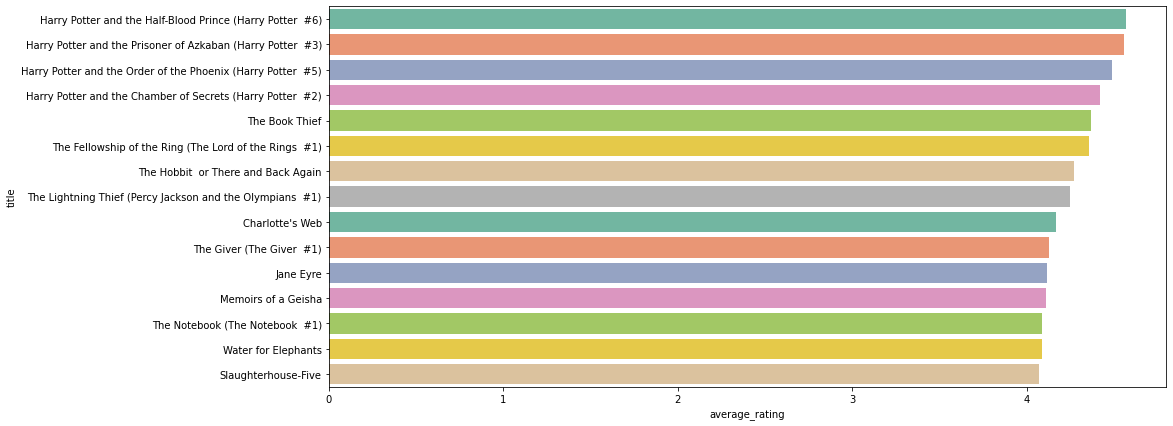

In [16]:
plt.subplots(figsize=(15,7))
sns.barplot(data=top_books, x='average_rating', y='title', palette='Set2',)


## 1. Ryšys tarp knygų įvertinimų ir puslapių skaičiaus

In [19]:
top_books['num_pages'].mean()

411.4

In [18]:
books['num_pages'].mean()

336.4055560550211

In [20]:
books['num_pages'].max()

6576

<Figure size 1080x1080 with 0 Axes>

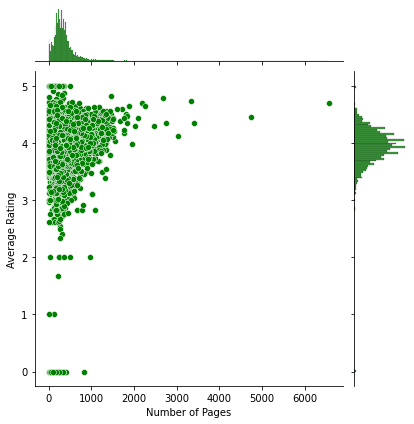

In [21]:
plt.figure(figsize=(15,15))
rating_to_pages = sns.jointplot(x='num_pages', y='average_rating', data=books, color='green')
rating_to_pages.set_axis_labels('Number of Pages', 'Average Rating')

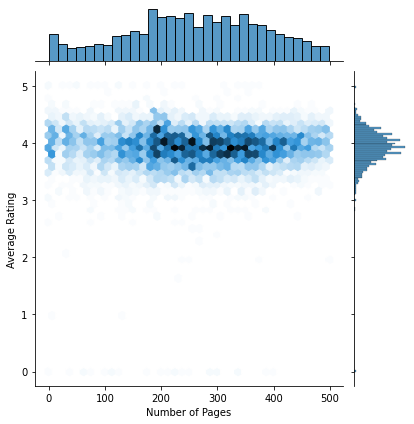

In [22]:
rating_books = books[books['num_pages'] < 500 ]

rating_to_pages = sns.jointplot(x='num_pages', y='average_rating', data=rating_books, kind='hex')
rating_to_pages.set_axis_labels('Number of Pages', 'Average Rating')



Dažniausiai geriausiai vertinamos knygos turi vidutinį skaičių puslapių 190-350. Panašu, kad labai plonos ar labai storos knygos nėra taip gerai vertinamos. Geriausiai vertinamų 15-likos knygų vidutinis puslapių kiekis yra 411, tai net šiek tiek viršija parametrus matomus diagramoje viršuje.

# Knygos su daugiausia parašytų atsiliepimų

In [31]:
top_reviews  = books.sort_values(by='text_reviews_count', ascending=False).head(15)

<AxesSubplot:xlabel='text_reviews_count', ylabel='title'>

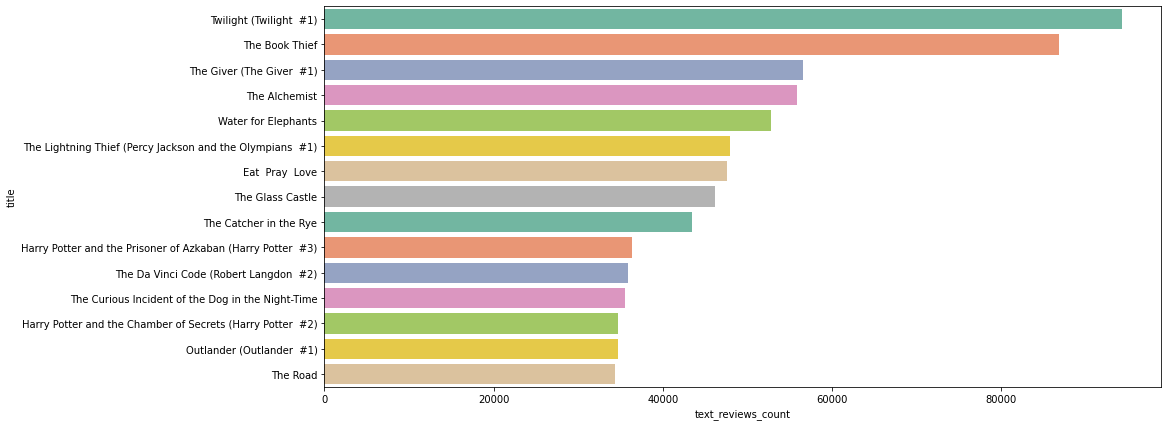

In [34]:
plt.figure(figsize=(15,7))
sns.barplot(data=top_reviews, x='text_reviews_count', y='title', palette='Set2')

# 2. Ryšys tarp atsiliepimų skaičiaus ir geriausiai vertinamų knygų

In [41]:
merged_top = pd.merge(top_books, top_reviews, how='inner', on='title')
merged_top['title']

0    Harry Potter and the Prisoner of Azkaban (Harr...
1    Harry Potter and the Chamber of Secrets (Harry...
2                                       The Book Thief
3    The Lightning Thief (Percy Jackson and the Oly...
4                            The Giver (The Giver  #1)
5                                  Water for Elephants
Name: title, dtype: object

In [66]:
books['text_reviews_count'].mean()

542.048098534568

<bound method _make_class_factory.<locals>.class_factory.<locals>.subcls.set of <AxesSubplot:xlabel='text_reviews_count', ylabel='average_rating'>>

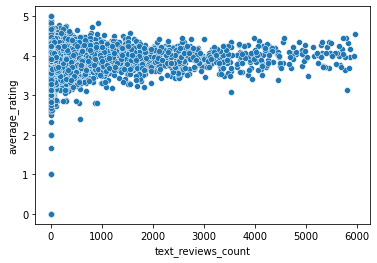

In [64]:
reviews = books[books['text_reviews_count'] < 6000 ]

ratings_reviews = sns.scatterplot(data=reviews, x='text_reviews_count', y='average_rating')
ratings_reviews.set

Nėra ryšio tarp vertinimų ir atsiliepimų skaičiaus, nebent kad mažai vertinamos knygos (0-3 skalėje) neturi beveik išvis parašytų atsiliepimų. Dažniau atsiliepimus palieka prie 3-5 įvertintų knygų, ir tai dažniausias atsiliepimų skaičius iki 1000.  

# 3. Ar yra ryškus laikotarpis (metai) kada buvo daugiausiai išleista knygų


In [160]:
books.isna().sum()
books = books.dropna()

In [158]:
books.isna().sum()

title                 0
authors               0
average_rating        0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
year                  0
dtype: int64

In [170]:
books['year'] = books['publication_date'].dt.year.astype(np.int32)
books.head(2)


,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2006
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2004


(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        6.000e+00, 1.200e+01, 1.500e+01, 2.300e+01, 3.300e+01, 4.100e+01,
        5.800e+01, 1.210e+02, 1.370e+02, 2.950e+02, 4.630e+02, 8.170e+02,
        1.386e+03, 2.918e+03, 4.547e+03, 1.520e+02, 5.500e+01, 2.500e+01]),
 array([1900., 1904., 1908., 1912., 1916., 1920., 1924., 1928., 1932.,
        1936., 1940., 1944., 1948., 1952., 1956., 1960., 1964., 1968.,
        1972., 1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004.,
        2008., 2012., 2016., 2020.]),
 <BarContainer object of 30 artists>)

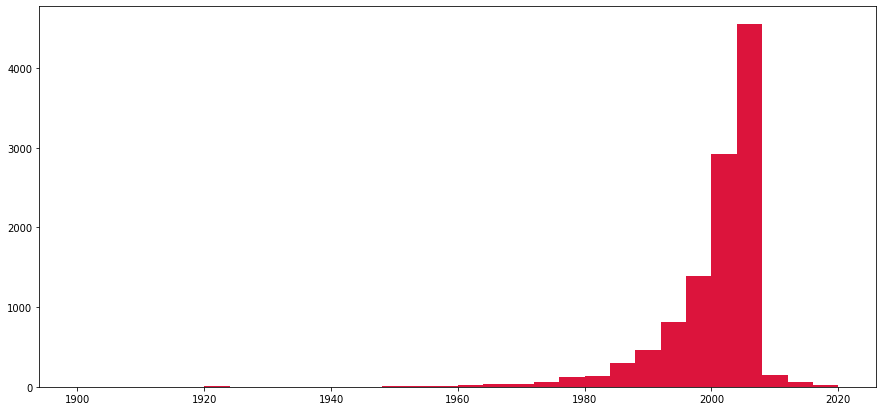

In [190]:
plt.figure(figsize=(15,7))
plt.hist(x=books['year'], bins=30, color='crimson')

Nuo 1960m skaičius pradėjo kilti, su didžiausiu šuoliu ties 2000 metais. Daugiausia knygų buvo išleista po 2000 metų. 

# 4. Ar yra ryškiai lyderiaujanti leidykla, kurios knygos vertinamos geriausiai